## Imports 

In [17]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.datasets import reuters
from keras import models
from keras import layers
import matplotlib.pyplot as plt
import numpy as np

from keras import backend as K
K.set_image_dim_ordering('th')



### Read the train and test Data 
#### Image size -> Example size (32*32)
#### Data size (13440  Train and Validation) and (3360 Test)

In [2]:
#Read the training and test Data using any library from the folder or the csv file

# load Train and Test Data 

# Train ===========================
x_train_file = open('Arabic-Handwritten-Characters-Dataset-master\csvTrainImages 13440x1024.csv', 'rb')
x_train_data = np.loadtxt(x_train_file, delimiter=",")  # shape (13440,1024)



y_train_file = open('Arabic-Handwritten-Characters-Dataset-master\csvTrainLabel 13440x1.csv', 'rb')
y_train_data = np.loadtxt(y_train_file, delimiter=",") # shape (13440,)


# Test ===========================
x_test_file = open('Arabic-Handwritten-Characters-Dataset-master\csvTestImages 3360x1024.csv', 'rb')
x_test_data = np.loadtxt(x_test_file, delimiter=",") # shape (3360,1024)


y_test_file = open('Arabic-Handwritten-Characters-Dataset-master\csvTestLabel 3360x1.csv', 'rb')
y_test_data = np.loadtxt(y_test_file, delimiter=",") # shape (3360,)

x_train_img = x_train_data.reshape(x_train_data.shape[0], 32, 32).astype('float32') 
x_test_img = x_test_data.reshape(x_test_data.shape[0], 32, 32).astype('float32') 

x_train_img = np.rot90(x_train_img, 3, (1,2)) # Rotate by 290 deg 
x_test_img = np.rot90(x_test_img, 3, (1,2)) # Rotate by 290 deg 

print(x_train_img.shape)

(13440, 32, 32)


## Check sample of the training and testing images

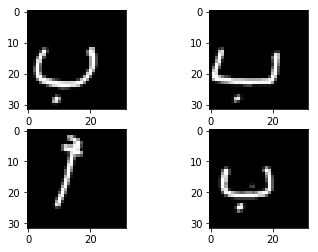

In [3]:
plt.subplot(221)
plt.imshow(x_train_img[10], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train_img[11], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_test_img[0], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_test_img[3], cmap=plt.get_cmap('gray'))

In [4]:
print(y_test_data[3])

2.0


## Pre-Processing

In [5]:
# Reshape to be suitable for the cnn
x_train = x_train_img.reshape(x_train_img.shape[0], 1, 32, 32).astype('float32')
x_test = x_test_img.reshape(x_test_img.shape[0], 1, 32, 32).astype('float32')


# normalize inputs from 0-255 to 0-1
x_train = x_train / 255
x_test = x_test / 255



# one hot encode outputs
y_train = np_utils.to_categorical(y_train_data)
y_test = np_utils.to_categorical(y_test_data)
num_classes = y_test.shape[1]

print(x_train.shape)


(13440, 1, 32, 32)


## CNN Model , Compile , Fit, and Evaluate

In [12]:
#Design the CNN layers here
def cnn_model():
    # create model
    model = Sequential()
    model.add(Conv2D(80, (5, 5), input_shape=(1, 32, 32), activation='relu'  , padding='valid')  )    
    model.add(MaxPooling2D(pool_size=(2, 2), padding='valid', strides=2 ))
    
    model.add(Conv2D(64, (5, 5), activation='relu', padding='valid'))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    
    model.add(MaxPooling2D(pool_size=(2, 2), padding='valid', strides=2 ))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5)) # don't use drop out in CNN Layers
    model.add(Dense(num_classes, activation='softmax'))

    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [21]:
# Compile, fit and validate your model 
# use 0.1 of the training data only to validate your model accuracy using this function 
# model.fit(X_train, y_train, validation_split=.1, epochs=10, batch_size=200,shuffle=True, verbose=1)
# feel free to change the epochs and batch_size numbers


# build the model
model = cnn_model()


model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 80, 28, 28)        2080      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 80, 14, 14)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 64, 10, 10)        128064    
_________________________________________________________________
batch_normalization_3 (Batch (None, 64, 10, 10)        40        
_________________________________________________________________
activation_2 (Activation)    (None, 64, 10, 10)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 64, 5, 5)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
__________

In [22]:

# Fit the model
history = model.fit(x_train, y_train, validation_split=.1, epochs=70, batch_size=300, verbose=1)


Train on 12096 samples, validate on 1344 samples
Epoch 1/70
12096/12096 [==============================] - 92s 8ms/step - loss: 3.0339 - acc: 0.1421 - val_loss: 2.3555 - val_acc: 0.3318
Epoch 2/70
12096/12096 [==============================] - 80s 7ms/step - loss: 2.0707 - acc: 0.3606 - val_loss: 1.4879 - val_acc: 0.5915
Epoch 3/70
12096/12096 [==============================] - 81s 7ms/step - loss: 1.4182 - acc: 0.5355 - val_loss: 0.9882 - val_acc: 0.7225
Epoch 4/70
12096/12096 [==============================] - 85s 7ms/step - loss: 1.0528 - acc: 0.6438 - val_loss: 0.7400 - val_acc: 0.7708
Epoch 5/70
12096/12096 [==============================] - 80s 7ms/step - loss: 0.7978 - acc: 0.7289 - val_loss: 0.5728 - val_acc: 0.8222
Epoch 6/70
12096/12096 [==============================] - 79s 7ms/step - loss: 0.6464 - acc: 0.7825 - val_loss: 0.4716 - val_acc: 0.8356
Epoch 7/70
12096/12096 [==============================] - 79s 7ms/step - loss: 0.5348 - acc: 0.8191 - val_loss: 0.4554 - val_acc:

12096/12096 [==============================] - 79s 6ms/step - loss: 0.0332 - acc: 0.9893 - val_loss: 0.4014 - val_acc: 0.9196
Epoch 61/70
12096/12096 [==============================] - 80s 7ms/step - loss: 0.0281 - acc: 0.9907 - val_loss: 0.3581 - val_acc: 0.9204
Epoch 62/70
12096/12096 [==============================] - 80s 7ms/step - loss: 0.0267 - acc: 0.9908 - val_loss: 0.3850 - val_acc: 0.9256
Epoch 63/70
12096/12096 [==============================] - 79s 7ms/step - loss: 0.0235 - acc: 0.9931 - val_loss: 0.3652 - val_acc: 0.9256
Epoch 64/70
12096/12096 [==============================] - 79s 7ms/step - loss: 0.0245 - acc: 0.9907 - val_loss: 0.4032 - val_acc: 0.9256
Epoch 65/70
12096/12096 [==============================] - 79s 7ms/step - loss: 0.0280 - acc: 0.9915 - val_loss: 0.3999 - val_acc: 0.9278
Epoch 66/70
12096/12096 [==============================] - 78s 6ms/step - loss: 0.0310 - acc: 0.9878 - val_loss: 0.3856 - val_acc: 0.9234
Epoch 67/70
12096/12096 [=====================

## Visualize the train and validate Error

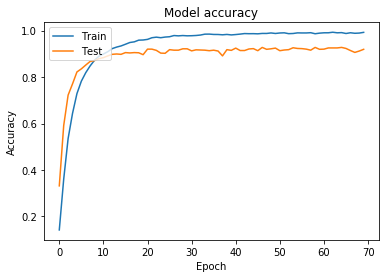

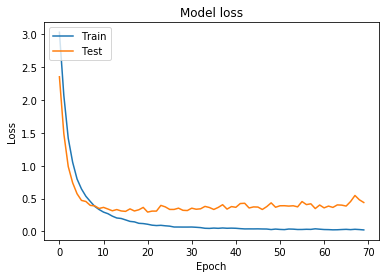

In [23]:

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## ِApply Early Stopping stop training at epoch 10

In [26]:
# Re build the model
model = cnn_model()

# Fit the model again
history = model.fit(x_train, y_train, validation_split=.1, epochs=10, batch_size=300, verbose=1)


Train on 12096 samples, validate on 1344 samples
Epoch 1/10
12096/12096 [==============================] - 93s 8ms/step - loss: 2.9891 - acc: 0.1532 - val_loss: 2.3364 - val_acc: 0.3646
Epoch 2/10
12096/12096 [==============================] - 90s 7ms/step - loss: 2.0391 - acc: 0.3730 - val_loss: 1.4877 - val_acc: 0.6131
Epoch 3/10
12096/12096 [==============================] - 96s 8ms/step - loss: 1.3798 - acc: 0.5471 - val_loss: 0.9602 - val_acc: 0.7217
Epoch 4/10
12096/12096 [==============================] - 85s 7ms/step - loss: 0.9882 - acc: 0.6763 - val_loss: 0.6680 - val_acc: 0.7894
Epoch 5/10
12096/12096 [==============================] - 92s 8ms/step - loss: 0.7481 - acc: 0.7521 - val_loss: 0.5357 - val_acc: 0.8237
Epoch 6/10
12096/12096 [==============================] - 85s 7ms/step - loss: 0.6004 - acc: 0.8008 - val_loss: 0.4637 - val_acc: 0.8504
Epoch 7/10
12096/12096 [==============================] - 91s 8ms/step - loss: 0.5035 - acc: 0.8313 - val_loss: 0.3997 - val_acc:

In [27]:

scores = model.evaluate(x_test, y_test, verbose=0)
print("CNN Error Rate: %.2f%%" % (100 - scores[1]*100))

# We will compare the three arch with the validation accuracy 
# name our jupyter file with your first name under score mode
# Y_model -> Youssef
# N_model -> Nabeil
# M_model -> Menna

# create a branch with your name and push on it

# >>>>>>>>>>>>> Don't measure your performance on the test data to avoid overfitting  <<<<<<<<<<<<<<<<<<<<

# after choosing the best Arch we will measure it's performance on the test set


CNN Error Rate: 7.92%


## Predict some images with our model and check there correct label

[18]


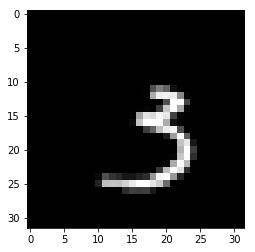

In [28]:
index = 371 # of the sample to be tested

y = model.predict_classes(x_test[index:index+1])
plt.imshow(x_test_img[index], cmap=plt.get_cmap('gray'))
print(y)